### Captura de dados do Bacen, de uso de meios de pagamentos entre os anos de 2019 e 2024.
#### Libs utilizadas
* Requests
* Pandas
* Matplot

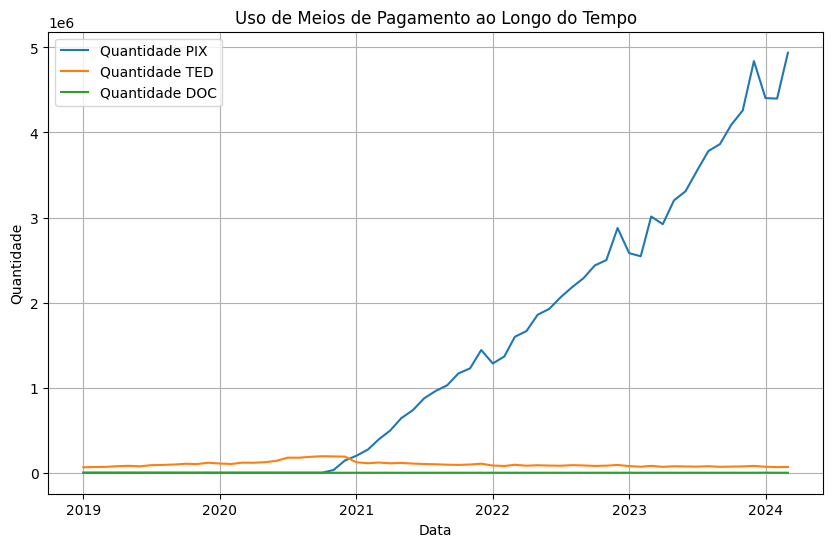

In [38]:
import requests as req
import pandas as pd
import matplotlib.pyplot as plt

# Fazendo a requisição
res = req.get('https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosMensalDA(AnoMes=@AnoMes)?@AnoMes=%27201901%27&$top=101&$format=json')

# Verificando se a requisição foi bem sucedida
if res.status_code == 200:
    data = res.json()

    # Criando um DataFrame com os dados
    df = pd.DataFrame(data['value'], columns=['AnoMes', 'quantidadePix', 'quantidadeTED', 'quantidadeDOC']).sort_values(by='AnoMes')

    df.to_csv('dados.csv')
    # Convertendo a coluna AnoMes para o formato datetime
    df['AnoMes'] = pd.to_datetime(df['AnoMes'], format='%Y%m')

    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df['AnoMes'], df['quantidadePix'], label='Quantidade PIX')
    plt.plot(df['AnoMes'], df['quantidadeTED'], label='Quantidade TED')
    plt.plot(df['AnoMes'], df['quantidadeDOC'], label='Quantidade DOC')
    
    plt.title('Uso de Meios de Pagamento ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Quantidade')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print('Não foi possível executar a request')
